In [1]:
import warnings
import pandas as pd

df = pd.read_parquet("hf://datasets/DisgustingOzil/Academic_MCQ_Dataset/data/train-00000-of-00001.parquet")

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df.head()

,input,instruction,response
0,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a ste...
1,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following organisms we...
2,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,"<question> How long ago did mammals, birds, an..."
3,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> What is the purpose of the scientif...
4,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a rec...


In [4]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Sample sentence
sentence = "This is a sample sentence, with punctuation!"

# Tokenize the sentence
tokens = word_tokenize(sentence)

print(tokens)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['This', 'is', 'a', 'sample', 'sentence', ',', 'with', 'punctuation', '!']


In [5]:
def categorize(sentence):
    return word_tokenize(sentence)[1]

In [6]:
df['category'] = df['instruction'].apply(categorize)

In [7]:
df.head()

,input,instruction,response,category
0,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a ste...,Biology
1,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following organisms we...,Biology
2,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,"<question> How long ago did mammals, birds, an...",Biology
3,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> What is the purpose of the scientif...,Biology
4,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a rec...,Biology


In [8]:
df['category'].unique()

array(['Biology', 'Physics', 'Chemistry', 'General'], dtype=object)

In [9]:
def word_count(sentence):
    return len(word_tokenize(sentence))

In [10]:
df['length_input'] = df['input'].apply(word_count)

In [11]:
df.head()

,input,instruction,response,category,length_input
0,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a ste...,Biology,358
1,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following organisms we...,Biology,358
2,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,"<question> How long ago did mammals, birds, an...",Biology,358
3,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> What is the purpose of the scientif...,Biology,358
4,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a rec...,Biology,358


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

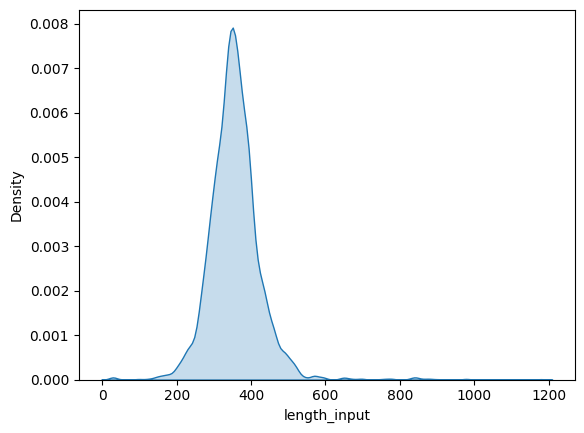

In [13]:
sns.kdeplot(df['length_input'] , shade=True)
plt.show()


DataFrame after deleting rows where input length is greater than 550:


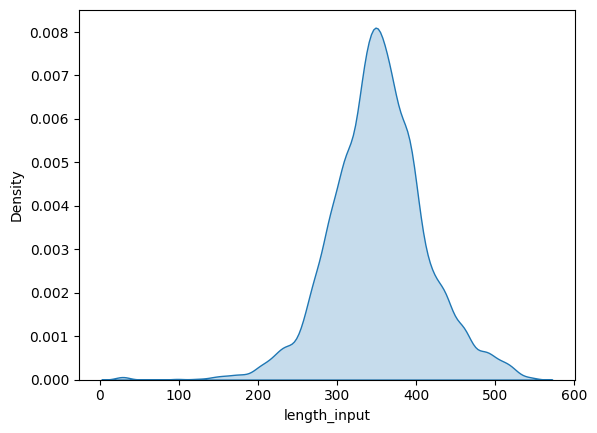

In [14]:
# Condition: Age less than 30
df_filtered = df[df['length_input'] <= 550]

print("\nDataFrame after deleting rows where input length is greater than 550:")
sns.kdeplot(df_filtered['length_input'] , shade=True)
plt.show()

In [15]:
print(df.shape, df_filtered.shape)

(15812, 5) (15668, 5)


In [16]:
df_filtered['length_qna'] = df_filtered['response'].apply(word_count)

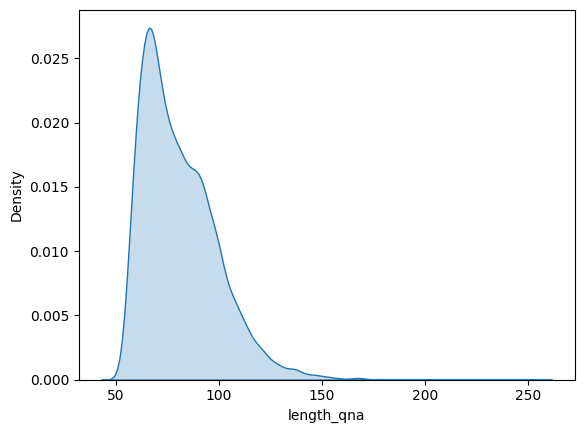

In [17]:
sns.kdeplot(df_filtered['length_qna'] , shade=True)
plt.show()


DataFrame after deleting rows where response length is greater than 120:


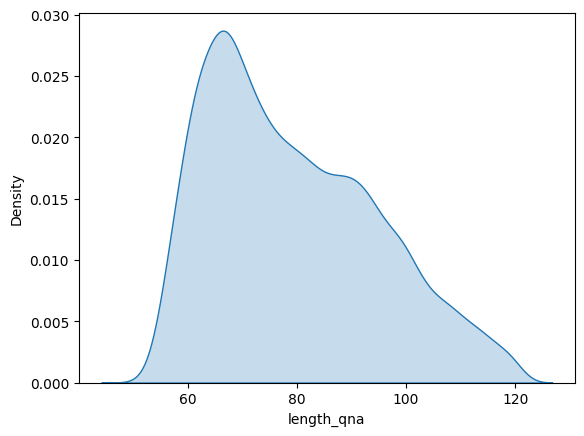

In [18]:
df_filtered = df_filtered[df_filtered['length_qna'] <= 120]

print("\nDataFrame after deleting rows where response length is greater than 120:")
sns.kdeplot(df_filtered['length_qna'] , shade=True)
plt.show()

In [19]:
print(df.shape, df_filtered.shape)

(15812, 5) (15178, 6)


In [20]:
value_count = df_filtered['category'].value_counts()
print(value_count)

category
Chemistry    5116
General      3757
Physics      3375
Biology      2930
Name: count, dtype: int64


In [21]:
def extract_question(text):
    start_tag = "<question>"
    end_tag = "</question>"
    
    # Find the start and end positions
    start = text.find(start_tag) + len(start_tag)
    end = text.find(end_tag)
    
    # Extract the text between the tags
    if start != -1 and end != -1:
        return text[start:end].strip()
    else:
        return None

# Example usage
data = """<question> Which of the following is NOT a step in the scientific method? </question> <answer> d. Drawing conclusions based on results </answer> <distractor> <d> Making observations </d> <d> Forming hypotheses </d> <d> Conducting experiments </d> <d> Drawing conclusions based on results</d> </distractor>"""

question_text = extract_question(data)
print(question_text)

Which of the following is NOT a step in the scientific method?


In [22]:
def extract_answer(text):
    start_tag = "<answer>"
    end_tag = "</answer>"
    
    # Find the start and end positions
    start = text.find(start_tag) + len(start_tag)
    end = text.find(end_tag)
    
    # Extract the text between the tags
    if start != -1 and end != -1:
        if len(text[start:end].strip()) >= 2:
    #         print(f"\n\n{text[start:end].strip()}")
            if text[start:end].strip()[1] == '.':
                return  text[start:end].strip()[3:] 
            if text[start:end].strip()[0] == ')':
                return  text[start:end].strip()[2:] 
            elif text[start:end].strip()[:4] == "rect":
                return  text[start:end].strip()[16:] 
            else:
                return text[start:end].strip()
        else:
            return text[start:end].strip()
    else:
        return None
def extract_correct_option(text):
    start_tag = "<answer>"
    end_tag = "</answer>"
    
    # Find the start and end positions
    start = text.find(start_tag) + len(start_tag)
    end = text.find(end_tag)
    
    # Extract the text between the tags
    if start != -1 and end != -1:
        return text[start:end].strip()[0] 
    else:
        return None

# Example usage
data = """<question> Which of the following is NOT a step in the scientific method? </question> <answer> d. Drawing conclusions based on results </answer> <distractor> <d> Making observations </d> <d> Forming hypotheses </d> <d> Conducting experiments </d> <d> Drawing conclusions based on results</d> </distractor>"""
data2 = """
<question> What is the purpose of using crown ethers in the transportation of specific metal cations through biological membranes? </question> <answer> rect answer: b) To enhance ion selectivity </answer> <distractor> <d> To inhibit ion binding </d> <d> To enhance ion selectivity </d> <d> To promote bacterial growth </d> <d> To neutralize toxins</d> </distractor>
"""
data3 = """
<question> What reagent is commonly used for the partial reduction of carboxylic acid derivatives to aldehydes? </question> <answer> DIBAH </answer> <distractor> <d> LiAlH4 </d> <d> NaBH4 </d> <d> DIBAH </d> <d> PCC</d> </distractor>
"""
answer_text = extract_answer(data)
# correct_option = extract_correct_option(data)
print(answer_text)
# print(correct_option)

answer_text = extract_answer(data2)
# correct_option = extract_correct_option(data)
print(answer_text)
# print(correct_option)

answer_text = extract_answer(data3)
# correct_option = extract_correct_option(data)
print(answer_text)
# print(correct_option)

Drawing conclusions based on results
To enhance ion selectivity
DIBAH


In [23]:
import re
hashmap = {
    'a':0,
    'b':1,
    'c':2,
    'd':3
}
def extract_distractors(text):
    distractors = []
    distractor_section = re.search(r'<distractor>(.*?)</distractor>', text, re.DOTALL)
    
    if distractor_section:
        # Extract all text between <d> and </d> tags within the distractor section
        distractors = re.findall(r'<d>(.*?)</d>', distractor_section.group(1), re.DOTALL)
        
        # Strip any leading/trailing whitespace from each distractor
        distractors = [d.strip() for d in distractors]
    correct_answer = extract_answer(text)
    if correct_answer in distractors:
        distractors.remove(correct_answer)
        return distractors
    else:
        print(f"{distractors}-----{correct_answer}")
        return f"<d>"

# Example usage
data = """<question> Which of the following is NOT a step in the scientific method? </question> <answer> d. Drawing conclusions based on results </answer> <distractor> <d> Making observations </d> <d> Forming hypotheses </d> <d> Conducting experiments </d> <d> Drawing conclusions based on results</d> </distractor>"""

distractors_list = extract_distractors(data)
print(distractors_list)

['Making observations', 'Forming hypotheses', 'Conducting experiments']


In [24]:
df_filtered['question'] = df_filtered['response'].apply(extract_question)
df_filtered['answer'] = df_filtered['response'].apply(extract_answer)
# df_filtered['correct_option'] = df_filtered['response'].apply(extract_correct_option)
df_filtered['distractors'] = df_filtered['response'].apply(extract_distractors)

['To lipids', 'To proteins', 'To nucleic acids', 'To phospholipids']-----To lipids and b) To proteins
['wer: False', 'What is the main function of primary active transport?', 'To maintain the balance of sodium and potassium levels in a cell', 'To create an electrochemical gradient']-----To move substances against their concentration gradient
['wer: a. To maintain the balance of sodium and potassium levels in a cell', 'Which gradient affects the movement of ions in living systems?', 'Concentration gradient', 'Electrical gradient']-----Both concentration and electrical gradients
['wer: c. Both concentration and electrical gradients', 'Which type of carrier protein carries two different substances in the same direction?', 'Uniporters', 'Symporters']-----Antiporters
['wer: b. Symporters', "True or False: Active transport processes rely on the cell's metabolism for energy.", 'wer: True', 'Which type of active transport is driven by the charge difference created by primary active transport?'

In [25]:
df_filtered.head()

,input,instruction,response,category,length_input,length_qna,question,answer,distractors
0,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a ste...,Biology,358,72,Which of the following is NOT a step in the sc...,Drawing conclusions based on results,"[Making observations, Forming hypotheses, Cond..."
1,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following organisms we...,Biology,358,73,Which of the following organisms were the firs...,Microorganisms in the ocean,"[Mammals, birds, and flowers, Humans, Plants]"
2,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,"<question> How long ago did mammals, birds, an...",Biology,358,78,"How long ago did mammals, birds, and flowers o...",130 to 250 million years ago,"[2.5 million years ago, 300,000 years ago, Bil..."
3,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> What is the purpose of the scientif...,Biology,358,73,What is the purpose of the scientific method?,All of the above,"[To make careful observations, To formulate hy..."
4,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a rec...,Biology,358,102,Which of the following is NOT a recent news to...,Global effort to protect the environment and a...,"[Outbreaks of Escherichia coli in spinach, Sal..."


In [26]:
df_filtered['len_distractors'] = df_filtered['distractors'].apply(len)

In [27]:
df_filtered.head()

,input,instruction,response,category,length_input,length_qna,question,answer,distractors,len_distractors
0,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a ste...,Biology,358,72,Which of the following is NOT a step in the sc...,Drawing conclusions based on results,"[Making observations, Forming hypotheses, Cond...",3
1,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following organisms we...,Biology,358,73,Which of the following organisms were the firs...,Microorganisms in the ocean,"[Mammals, birds, and flowers, Humans, Plants]",3
2,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,"<question> How long ago did mammals, birds, an...",Biology,358,78,"How long ago did mammals, birds, and flowers o...",130 to 250 million years ago,"[2.5 million years ago, 300,000 years ago, Bil...",3
3,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> What is the purpose of the scientif...,Biology,358,73,What is the purpose of the scientific method?,All of the above,"[To make careful observations, To formulate hy...",3
4,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a rec...,Biology,358,102,Which of the following is NOT a recent news to...,Global effort to protect the environment and a...,"[Outbreaks of Escherichia coli in spinach, Sal...",3


In [28]:
df_filtered['len_ans'] = df_filtered['answer'].apply(word_count)

In [29]:
df_filtered.head()

,input,instruction,response,category,length_input,length_qna,question,answer,distractors,len_distractors,len_ans
0,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a ste...,Biology,358,72,Which of the following is NOT a step in the sc...,Drawing conclusions based on results,"[Making observations, Forming hypotheses, Cond...",3,5
1,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following organisms we...,Biology,358,73,Which of the following organisms were the firs...,Microorganisms in the ocean,"[Mammals, birds, and flowers, Humans, Plants]",3,4
2,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,"<question> How long ago did mammals, birds, an...",Biology,358,78,"How long ago did mammals, birds, and flowers o...",130 to 250 million years ago,"[2.5 million years ago, 300,000 years ago, Bil...",3,6
3,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> What is the purpose of the scientif...,Biology,358,73,What is the purpose of the scientific method?,All of the above,"[To make careful observations, To formulate hy...",3,4
4,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a rec...,Biology,358,102,Which of the following is NOT a recent news to...,Global effort to protect the environment and a...,"[Outbreaks of Escherichia coli in spinach, Sal...",3,10


<Axes: xlabel='len_ans', ylabel='count'>

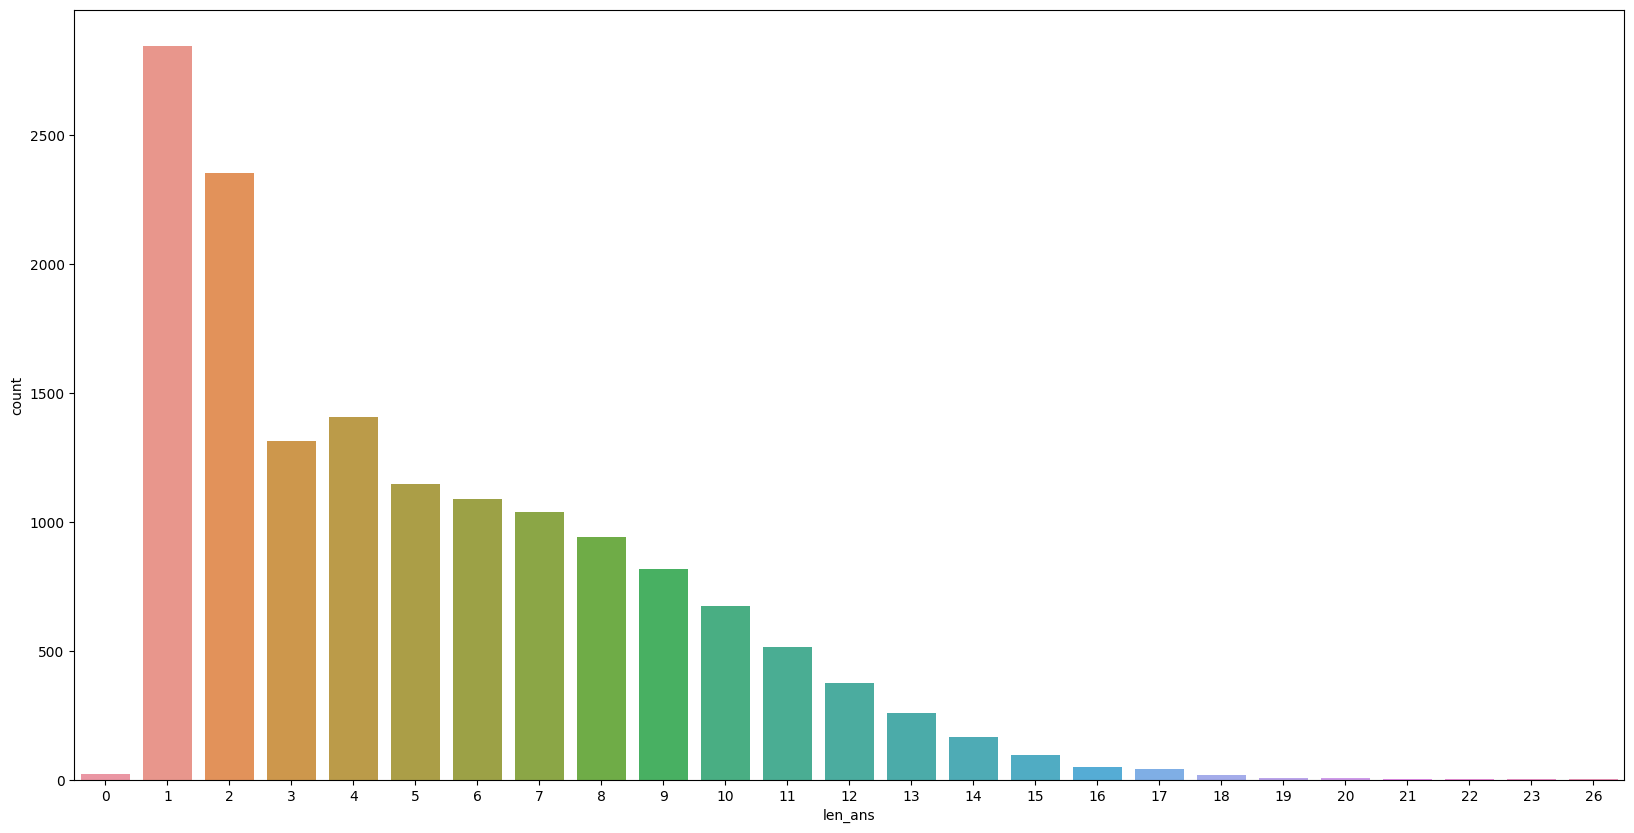

In [30]:
plt.figure(figsize = (20,10))
sns.countplot(df_filtered, x = 'len_ans')

In [31]:
df_filtered = df_filtered[df_filtered['len_ans'] <= 10]

<Axes: xlabel='len_ans', ylabel='count'>

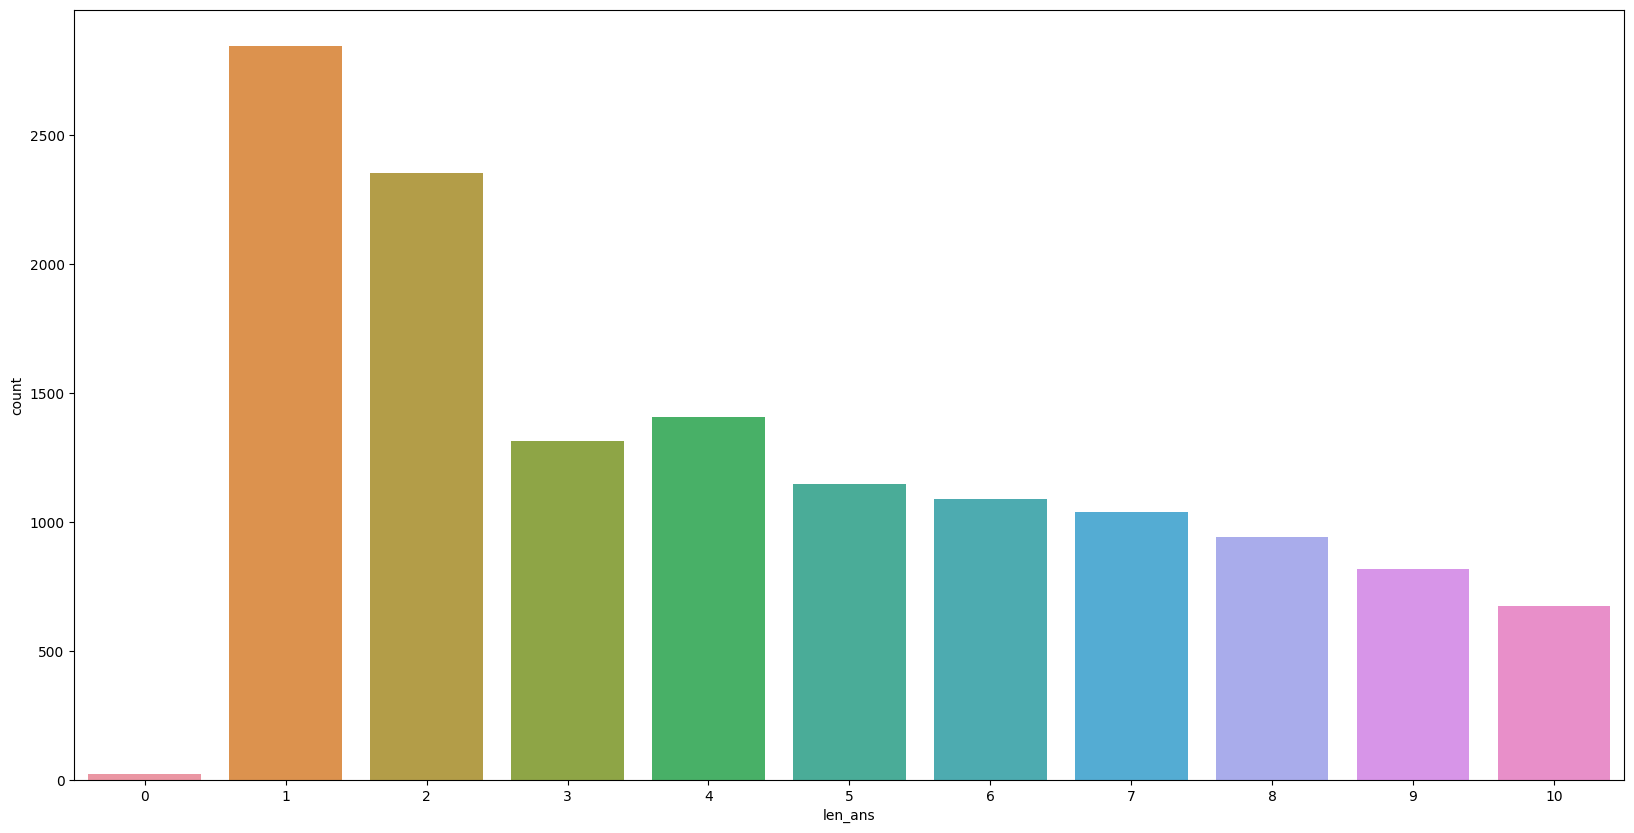

In [32]:
plt.figure(figsize = (20,10))
sns.countplot(df_filtered, x = 'len_ans')

In [33]:
# sns.kdeplot(df_filtered['len_distractors'])

In [34]:
# df_filtered[df_filtered['len_distractors'] == 3].shape[0]

In [35]:
# df_filtered = df_filtered[df_filtered['len_distractors'] != 3]



# # print("\nDataFrame after deleting rows where response length is greater than 120:")
# sns.kdeplot(df_filtered['len_distractors'] , shade=True)
# plt.show()

In [36]:
df_filtered.head()

,input,instruction,response,category,length_input,length_qna,question,answer,distractors,len_distractors,len_ans
0,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a ste...,Biology,358,72,Which of the following is NOT a step in the sc...,Drawing conclusions based on results,"[Making observations, Forming hypotheses, Cond...",3,5
1,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following organisms we...,Biology,358,73,Which of the following organisms were the firs...,Microorganisms in the ocean,"[Mammals, birds, and flowers, Humans, Plants]",3,4
2,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,"<question> How long ago did mammals, birds, an...",Biology,358,78,"How long ago did mammals, birds, and flowers o...",130 to 250 million years ago,"[2.5 million years ago, 300,000 years ago, Bil...",3,6
3,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> What is the purpose of the scientif...,Biology,358,73,What is the purpose of the scientific method?,All of the above,"[To make careful observations, To formulate hy...",3,4
4,"Biology is the study of life, from microscopic...",Generate Biology based Multiple Choice Questio...,<question> Which of the following is NOT a rec...,Biology,358,102,Which of the following is NOT a recent news to...,Global effort to protect the environment and a...,"[Outbreaks of Escherichia coli in spinach, Sal...",3,10


In [37]:
df_filtered.iloc[0,9]

3

In [38]:
len(df_filtered[df_filtered['answer'] == "None of the above"])

9

In [39]:
len(df_filtered[df_filtered['answer'] == "All of the above"])

247

In [40]:
df_filtered['answer'].value_counts()[:50]

answer
All of the above     247
Two                   29
B                     28
All of the above.     27
2                     24
C                     23
                      22
Three                 21
Both a) and b)        19
A                     19
Water                 19
Oxygen                17
3                     17
It decreases          15
ATP                   15
Iron                  14
Four                  14
Increases             12
4                     12
Both A and B          12
True                  11
Carbon dioxide        11
Liquid                11
Glucose               11
Oxidation             10
Photosynthesis        10
None of the above      9
6                      9
Fluorine               9
Carbon                 9
D                      9
Copper                 8
Gas                    8
7                      8
Solid                  8
Condensation           8
Addition               8
8                      8
Radiation              8
Magnesium         

In [41]:
len(df_filtered)

13639

In [42]:
df_filtered = df_filtered[(df_filtered['answer'] != "All of the above")]
len(df_filtered)

13392

In [43]:
df_filtered = df_filtered[(df_filtered['answer'] != "All of the above.")]
len(df_filtered)

13365

In [44]:
df_filtered = df_filtered[(df_filtered['answer'] != "Both a) and b)")]
len(df_filtered)

13346

In [45]:
df_filtered = df_filtered[(df_filtered['answer'] != "Both A and B")]
len(df_filtered)

13334

In [46]:
df_filtered = df_filtered[(df_filtered['answer'] != "None of the above")]
len(df_filtered)

13325

In [47]:
df = df_filtered[['input', 'category', 'question', 'answer', 'distractors']]

In [48]:
df.head()

,input,category,question,answer,distractors
0,"Biology is the study of life, from microscopic...",Biology,Which of the following is NOT a step in the sc...,Drawing conclusions based on results,"[Making observations, Forming hypotheses, Cond..."
1,"Biology is the study of life, from microscopic...",Biology,Which of the following organisms were the firs...,Microorganisms in the ocean,"[Mammals, birds, and flowers, Humans, Plants]"
2,"Biology is the study of life, from microscopic...",Biology,"How long ago did mammals, birds, and flowers o...",130 to 250 million years ago,"[2.5 million years ago, 300,000 years ago, Bil..."
4,"Biology is the study of life, from microscopic...",Biology,Which of the following is NOT a recent news to...,Global effort to protect the environment and a...,"[Outbreaks of Escherichia coli in spinach, Sal..."
5,"Biology is the study of life, from microscopic...",Biology,Why can applying the scientific method be more...,These disciplines involve more complex variabl...,[These disciplines do not require careful obse...


In [49]:
'''
to create a dataframe with context in source column and qsn, answer in target columns,
2 list needed, 
one for source: list of context
one for target: list of proper formatting of questions and answers for particular questions and answers
'''
import ast
dict_context_qna = {}
count = 0
for row in df.iterrows():
    if row[1][0] not in dict_context_qna.keys():
        dict_context_qna[row[1][0]] = {
            "count" : 1,
            "category": f"{row[1][1]}",
            "target" : [{
                'question': row[1][2],
                'correct_option': row[1][3],
                'distractors': row[1][4]
            }]
        }
    else:
        dict_context_qna[row[1][0]]["count"] += 1
        dict_context_qna[row[1][0]]["target"].append({
                'question': row[1][2],
                'correct_option': row[1][3],
                'distractors': row[1][4]
            })

In [50]:
source = []
target = []
category = []
count = []
for key, value in dict_context_qna.items():
    source.append(f"Generate {value['count']} Quizzes which require logical reasoning in a list of JSON format from the given context.\nCONTEXT: {key}")
    target.append(value["target"])
    category.append(value["category"])
    count.append(value['count'])
new_df = pd.DataFrame(
    {"source": source,
    "target": target,
    "category": category,
    "count": count
    }
)

In [51]:
new_df.head()

,source,target,category,count
0,Generate 9 Quizzes which require logical reaso...,[{'question': 'Which of the following is NOT a...,Biology,9
1,Generate 9 Quizzes which require logical reaso...,[{'question': 'Which of the following is NOT a...,Biology,9
2,Generate 10 Quizzes which require logical reas...,[{'question': 'Which of the following is NOT a...,Biology,10
3,Generate 8 Quizzes which require logical reaso...,[{'question': 'Which of the following is NOT a...,Biology,8
4,Generate 7 Quizzes which require logical reaso...,[{'question': 'Which of the following scientis...,Biology,7


In [52]:
new_df.iloc[0,1]

[{'question': 'Which of the following is NOT a step in the scientific method?',
  'correct_option': 'Drawing conclusions based on results',
  'distractors': ['Making observations',
   'Forming hypotheses',
   'Conducting experiments']},
 {'question': 'Which of the following organisms were the first forms of life on Earth?',
  'correct_option': 'Microorganisms in the ocean',
  'distractors': ['Mammals, birds, and flowers', 'Humans', 'Plants']},
 {'question': 'How long ago did mammals, birds, and flowers originate?',
  'correct_option': '130 to 250 million years ago',
  'distractors': ['2.5 million years ago',
   '300,000 years ago',
   'Billions of years ago']},
 {'question': 'Which of the following is NOT a recent news topic related to biology?',
  'correct_option': 'Global effort to protect the environment and address climate change',
  'distractors': ['Outbreaks of Escherichia coli in spinach',
   'Salmonella contamination in peanut butter',
   "Research on finding cures for diseases

In [53]:
new_df.iloc[0,0]

"Generate 9 Quizzes which require logical reasoning in a list of JSON format from the given context.\nCONTEXT: Biology is the study of life, from microscopic cells to entire ecosystems. It covers a wide range of topics, including diseases, the environment, and genetics. The scientific method, a process of research and observation, is fundamental to biology. It involves steps such as making observations, forming hypotheses, and conducting experiments to test those hypotheses.\n\nThe first forms of life on Earth were microorganisms that existed in the ocean for billions of years before plants and animals appeared. Mammals, birds, and flowers are relatively recent developments, originating 130 to 250 million years ago. Humans have only been on the planet for the last 2.5 million years, and our current appearance has only emerged in the last 300,000 years.\n\nThe scientific method is a key aspect of biology. It involves making careful observations, formulating hypotheses (suggested explana

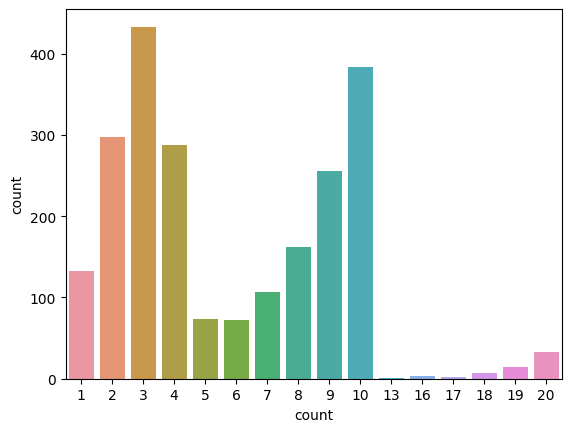

In [54]:
sns.countplot(new_df, x = 'count')
plt.show()

In [55]:
# new_df['target_len'] = new_df['target'].apply(word_count)

In [56]:
new_df.head()

,source,target,category,count
0,Generate 9 Quizzes which require logical reaso...,[{'question': 'Which of the following is NOT a...,Biology,9
1,Generate 9 Quizzes which require logical reaso...,[{'question': 'Which of the following is NOT a...,Biology,9
2,Generate 10 Quizzes which require logical reas...,[{'question': 'Which of the following is NOT a...,Biology,10
3,Generate 8 Quizzes which require logical reaso...,[{'question': 'Which of the following is NOT a...,Biology,8
4,Generate 7 Quizzes which require logical reaso...,[{'question': 'Which of the following scientis...,Biology,7


In [57]:
# # sns.kdeplot(new_df['target_len'] , shade=True)
# plt.show()

In [58]:
# new_df = new_df[new_df['target_len'] <=300]
# sns.kdeplot(new_df['target_len'] , shade=True)
# plt.show()

In [59]:
new_df = new_df[new_df['count'] <= 10]

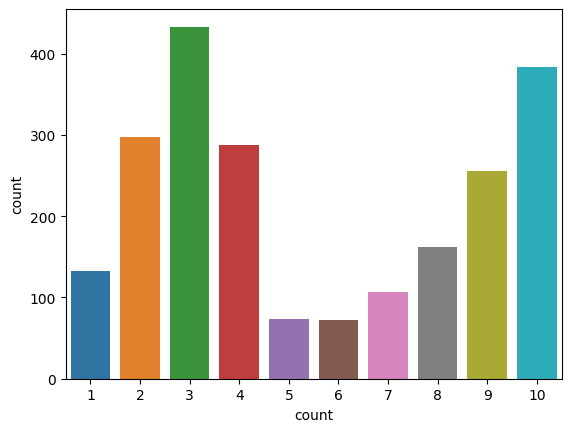

In [60]:
sns.countplot(new_df, x = 'count')
plt.show()

In [61]:
print(new_df.shape)

(2205, 4)


In [62]:
new_df['category'].value_counts()

category
General      1139
Chemistry     397
Physics       364
Biology       305
Name: count, dtype: int64

In [63]:
new_df.to_csv("academicMCQ_JSON.csv", index = False)